In [29]:
from lib import prob
from lib import vector as vec
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# de mere's game

# the probability of throwing a 6 on a die roll
p = 1/6  

# given a specific number of throws (a round),
# count how many times 6 shows up
round_count = lambda throws: prob.binomial(throws, p)

# play this game a lot of times, to estimate the likelihood of
# winning if one bets on "at least one 6 shows up in 4 throws of an even die"

n_rounds = 10000
wins = sum([round_count(4) > 0 for _ in range(n_rounds)])
print(f"You won {100 * wins/n_rounds:0.2f}% of {n_rounds} throws")


You won 51.97% of 10000 throws


In [3]:
# de mere's one-up: two dice, pair of sixes

round = lambda throws,dice: list(zip(*[vec.create_random(throws, 1, 6) for _ in range(dice)]))

dice = 2
n_rounds = 1000
winning_throw = (6,6)

# play
for throws_per_round in range(20, 30):
    wins = 0
    for _ in range(n_rounds):
        round_win = winning_throw in round(throws_per_round, dice)
        wins = wins + round_win
    print(f" Throws per round: {throws_per_round} ; chance of a winning throw : {100*wins/n_rounds:0.2f}%")

 Throws per round: 20 ; chance of a winning throw : 45.20%
 Throws per round: 21 ; chance of a winning throw : 43.00%
 Throws per round: 22 ; chance of a winning throw : 47.40%
 Throws per round: 23 ; chance of a winning throw : 48.70%
 Throws per round: 24 ; chance of a winning throw : 48.00%
 Throws per round: 25 ; chance of a winning throw : 49.90%
 Throws per round: 26 ; chance of a winning throw : 52.40%
 Throws per round: 27 ; chance of a winning throw : 53.70%
 Throws per round: 28 ; chance of a winning throw : 56.10%
 Throws per round: 29 ; chance of a winning throw : 57.00%


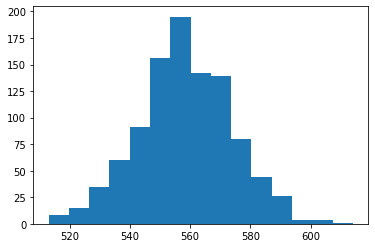

In [4]:
# what does the distribution of wins look like, for a given number of throws per round?

n_sims = 1000
wins = []

for __ in range(n_sims):
    w = 0
    for _ in range(n_rounds):
        round_win = winning_throw in round(throws_per_round, dice)
        w = w + round_win
    wins.append(w)
    
plt.hist(wins, bins = 15)
plt.show()

### Coin flips

In [78]:
# Example 1.4 - Peter and Paul's game

def flip_coins(n):
    return ''.join(["H" if prob.bernoulli(0.5) else "T" for _ in range(n)])


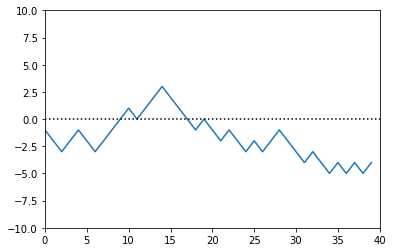

In [110]:
times = 40
flips = flip_coins(times)

balance = 0
streak = []
win = 1  # weight each win
lose = 1 # weight each loss

for outcome in flips:
    balance = balance + (1*win if outcome == "H" else -1*lose)
    streak.append(balance)
    
plt.plot(streak)
plt.axhline(y=0, color='black', linestyle=":")
ylim = abs(max(streak, key=abs))+5
plt.axis([0, len(flips), -ylim, ylim])
plt.show()

In [112]:
print(flips)

TTTHHTTHHHHTHHHTTTTHTTHTTHTHHTTTHTTHTHTH


## Chapter 1 Exercises

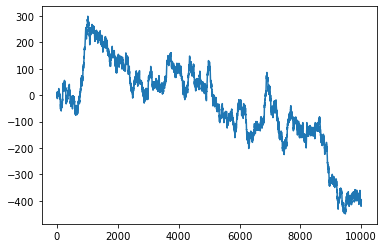

In [139]:
coin_flip = lambda: prob.bernoulli(0.5)

trials = 1000000

heads = 0
heads1 = []
heads2 = []

for i in range(1,trials+1):    
    heads = heads + coin_flip()
    if i % 100 == 0:
        heads1.append((heads/i) - 0.5)
        heads2.append(heads - 0.5*i)
        
plt.plot(heads2)


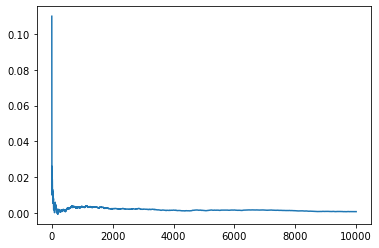

In [132]:
plt.plot(heads1)